<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/DL_Facial_Features_Detection_Using_Dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Features Detecion Using Dlib

Dlib is one of the state-of-the-art deep learning libraries built with C++, which is used in face detection. One of it's commonly used application is security etc.

The Dlib i used for my facial model is a landmark’s facial detector with pre-trained models, the dlib is used to estimate the location of 68 coordinates (x, y) that map the facial points on a person’s face.

The model already trained is the [shape_predictor_68_face_landmarks.dat](https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2) or [this](https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat) which is one of the list of other  [Dlib pretained models](https://github.com/davisking/dlib-models).

For this project, As a test case on the model used an image online and my camera. I got a code snippet from stack overflow used to access my camera on google colab.

In [18]:
#!pip install numpy opencv-python dlib imutils

In [20]:
# Import all necessary dependencies
from imutils import face_utils
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [3]:
!wget https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2 # Download the pre-train model here

--2023-05-02 09:03:14--  https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davisking/dlib-models/master/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2023-05-02 09:03:15--  https://raw.githubusercontent.com/davisking/dlib-models/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   373MB/s    in 0.2s 

In [4]:
!bunzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2 # Unzip the downloaded model

In [19]:
#!wget https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat # Or download the direct zipped file here

--2023-05-02 09:35:55--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2023-05-02 09:35:55--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.1’

shape_predictor_68_ 100%[===================>]  95.08M   434MB/s    in 0.2s    

2023-05-02 09:36:05 

In [6]:
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [15]:
# Code snippet from stack overflow to be used to access my camera
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


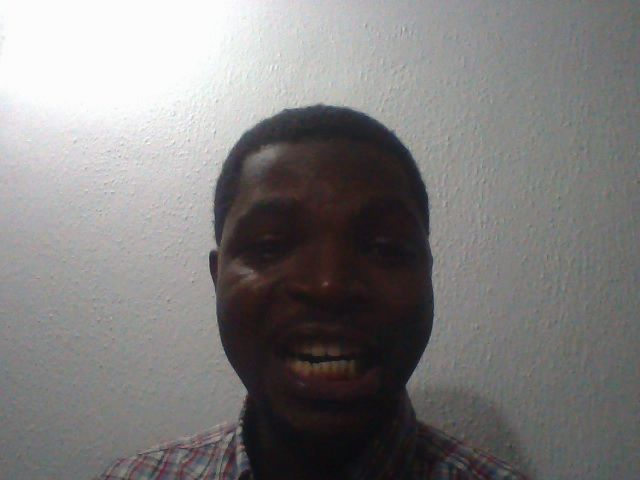

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

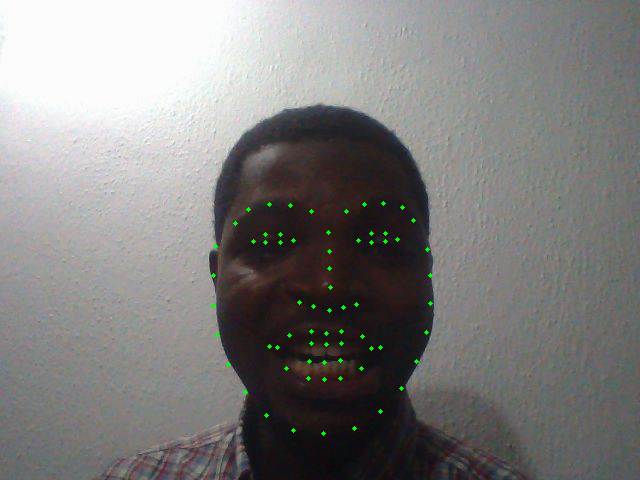

In [17]:

# load the input image and convert it to grayscale
read = cv2.imread(filename, cv2.IMREAD_COLOR)
#img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
        
# detect faces in the grayscale image
rects = detector(gray)
    
# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)
    
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
for (x, y) in shape:
    cv2.circle(read, (x, y), 2, (0, 255, 0), -1)
    
    # show the output image with the face detections + facial landmarks
cv2_imshow(read)

In [11]:
!wget https://bioupdates.com.ng/wp-content/uploads/2023/04/image-5.png # Download the internet image

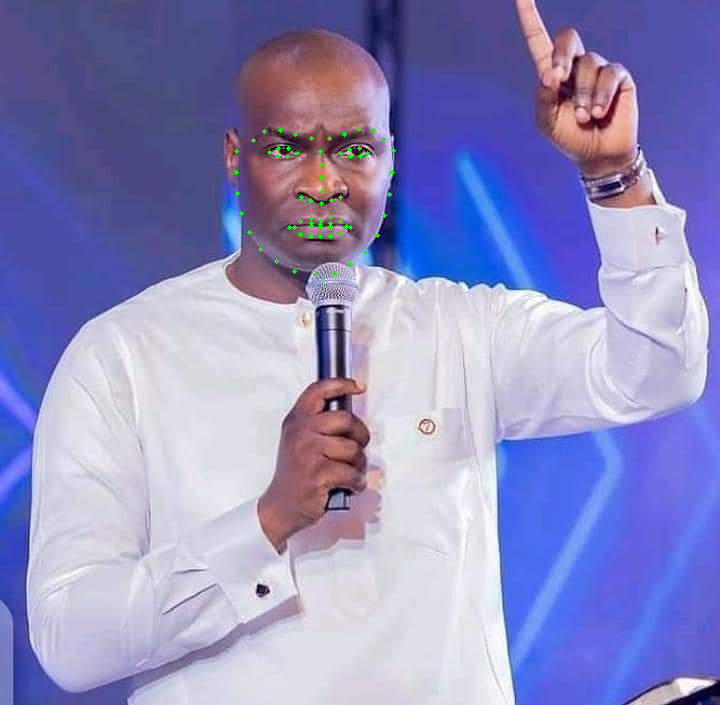

In [13]:
# load the input image and convert it to grayscale
filename = '/content/image-5.png'
read = cv2.imread(filename, cv2.IMREAD_COLOR)
#img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
        
# detect faces in the grayscale image
rects = detector(gray)
    
# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)
    
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
for (x, y) in shape:
    cv2.circle(read, (x, y), 2, (0, 255, 0), -1)
    
    # show the output image with the face detections + facial landmarks
cv2_imshow(read)

In [10]:
'''while True:
    # load the input image and convert it to grayscale
    read = cv2.imread(filename, cv2.IMREAD_COLOR)
    #img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
        
    # detect faces in the grayscale image
    rects = detector(gray, 0)
    
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(read, (x, y), 2, (0, 255, 0), -1)
    
    # show the output image with the face detections + facial landmarks
    cv2_imshow(read)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break'''

'while True:\n    # load the input image and convert it to grayscale\n    read = cv2.imread(filename, cv2.IMREAD_COLOR)\n    #img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)\n    gray = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)\n        \n    # detect faces in the grayscale image\n    rects = detector(gray, 0)\n    \n    # loop over the face detections\n    for (i, rect) in enumerate(rects):\n        # determine the facial landmarks for the face region, then\n        # convert the facial landmark (x, y)-coordinates to a NumPy\n        # array\n        shape = predictor(gray, rect)\n        shape = face_utils.shape_to_np(shape)\n    \n        # loop over the (x, y)-coordinates for the facial landmarks\n        # and draw them on the image\n        for (x, y) in shape:\n            cv2.circle(read, (x, y), 2, (0, 255, 0), -1)\n    \n    # show the output image with the face detections + facial landmarks\n    cv2_imshow(read)\n    k = cv2.waitKey(5) & 0xFF\n    if k == 27:\n        break'